In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [9]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [12]:
#removing character "F" present in data using pandas slicing
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

#convert values to integers for views , likes, comments , dislikes and adviews
data_train["views"] = pd.to_numeric(data_train["views"]) 
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [30]:
#convert time in sec for duration
import datetime
import time

def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  P=['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else :
      if(i=="H"):
        h=mm
        mm=''
      elif(i=="M"):
        m=mm
        m=''
      else:
        s=mm
        s=''
    if(h==''):
      h='00'
    if(m==''):
      m='00'
    if(s==''):
      s='00'
    bp=h+':'+m+':'+s
    return bp
  train=pd.read_csv("train.csv")
  mp = pd.read_csv(path + "train.csv")["duration"]
  time = mp.apply(checki)

  def func_sec(time_string):
    h,m,s = timestring.split(':')
    return int(h) *3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)

  data_train["duration"]=time1
  

In [31]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [32]:
#encoding features like category, duration, vidid
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train["duration"]=le.fit_transform(data_train["duration"])
data_train["published"]=le.fit_transform(data_train["published"])
data_train["vidid"]=le.fit_transform(data_train["vidid"])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


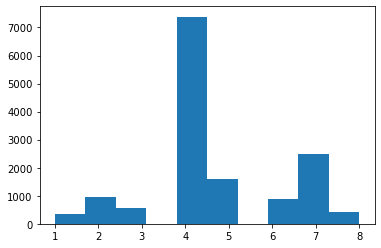

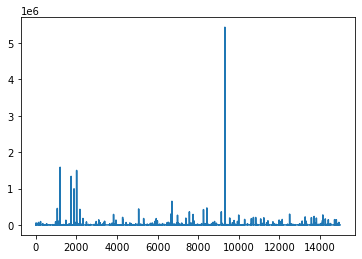

In [34]:
  #Visualisation
  #Individual Plots
  plt.hist(data_train["category"])
  plt.show()
  plt.plot(data_train["adview"])
  plt.show()

In [35]:
  #remove videos with adview greater than 2000000 as outlier
  data_train=data_train[data_train["adview"]<2000000]    

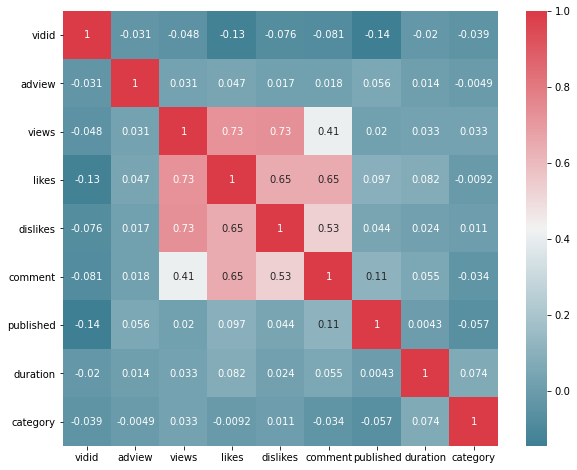

In [37]:
  #heatmap
  import seaborn as sns
  f,ax= plt.subplots(figsize=(10,8))
  corr = data_train.corr()
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool_),cmap=sns.diverging_palette(220,10,as_cmap=True),
              square=True,ax=ax,annot=True)
  plt.show()

In [47]:
  #split data
  Y_train = pd.DataFrame(data= data_train.iloc[:,1].values,columns = ['target'])
  data_train=data_train.drop(["adview"],axis=1)
  data_train=data_train.drop(["vidid"],axis=1)
  data_train.head()

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test=train_test_split(data_train,Y_train, test_size = 0.33, random_state=42)

  X_train.shape


(9806, 7)

In [48]:
  #Normalise data (convert into Numpy array from Panda array)
  from sklearn.preprocessing import MinMaxScaler
  scaler =MinMaxScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.fit_transform(X_test)

In [52]:
 # to evaluate performance of the particuar model we define a func to calc error
 from sklearn import metrics
 def print_error(X_test, y_test, model_name):
        prediction = model_name.predict(X_test)
        print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,prediction))
        print('Mean Squared Error :',metrics.mean_squared_error(y_test,prediction))
        print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


In [53]:
  #linear Regression
  from sklearn import linear_model
  linear_regression=linear_model.LinearRegression()
  linear_regression.fit(X_train, y_train)
  print_error(X_test,y_test,linear_regression)

Mean Absolute Error : 3966.706191494541
Mean Squared Error : 803885188.2311879
Root Mean Squared error :  28352.869135789202


In [54]:
  #Decision Tree
  from sklearn.tree import DecisionTreeRegressor
  decision_tree=DecisionTreeRegressor()
  decision_tree.fit(X_train,y_train)
  print_error(X_test,y_test,decision_tree)

Mean Absolute Error : 2932.8080745341613
Mean Squared Error : 1160199774.2515528
Root Mean Squared error :  34061.705392589385


In [56]:
  #Randomn forest
  from sklearn.ensemble import RandomForestRegressor
  n_estimators=200
  max_depth =25
  min_samples_split=15
  min_samples_leaf=2
  random_forest = RandomForestRegressor(n_estimators = n_estimators,max_depth= max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
  random_forest.fit(X_train,y_train)
  print_error(X_test,y_test,random_forest)

<ipython-input-56-203ad2fa6652>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error : 3898.000794085751
Mean Squared Error : 736330003.6222253
Root Mean Squared error :  27135.401298345034


In [58]:
  #Support Vector Regressor
  from sklearn.svm import SVR
  supportvector_regressor=SVR()
  supportvector_regressor.fit(X_train,y_train)
  print_error(X_test,y_test,linear_regression)

C:\Users\Savi Gandewar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error : 3966.706191494541
Mean Squared Error : 803885188.2311879
Root Mean Squared error :  28352.869135789202


In [61]:
  #saving scikitlean models
  import joblib
  joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [63]:
test = pd.read_csv('test.csv')
test.head()
test.shape

(8764, 8)

In [64]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [68]:
#removing character "F" present in data using pandas slicing
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']

#convert values to integers for views , likes, comments , dislikes and adviews
test["views"] = pd.to_numeric(test["views"]) 
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])
column_vidid=test['vidid']

test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [69]:
#encoding features like category, duration, vidid

le=LabelEncoder()
test["duration"]=le.fit_transform(test["duration"])
test["published"]=le.fit_transform(test["published"])
test["vidid"]=le.fit_transform(test["vidid"])

test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


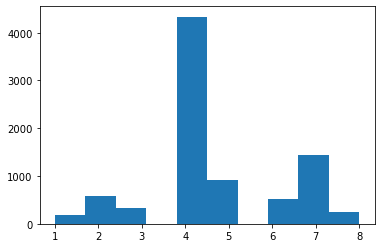

In [71]:
  #Visualisation
  #Individual Plots
  plt.hist(test["category"])
  plt.show()

In [72]:
model=joblib.load("decisiontree_youtubeadview.pkl")
predictions=model.predict(X_test)

In [77]:
res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res_reset=res.set_index("prediction")
res_reset.to_csv("PredictedAdview.csv")